In [81]:
import numpy as np
var('t x y')

(t, x, y)

3.0
8.0
[-0.83205029 -0.70710678]
[ 0.5547002  -0.70710678]


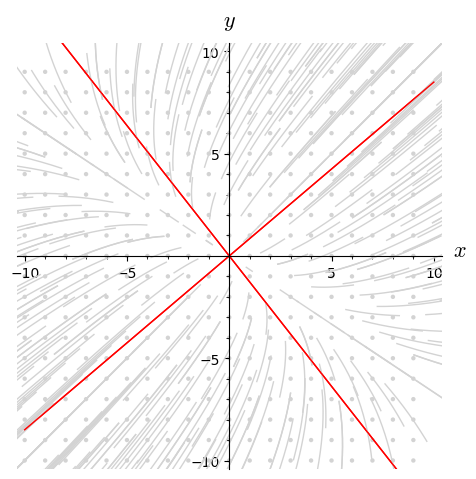

In [154]:
A = np.array([[5, 3], [2,6]])
eigs, vecs = np.linalg.eig(A)
l1 = eigs[0]
u1 = vecs[0]

l2 = eigs[1]
u2 = vecs[1]
cs = []#matrix([u1, u2]).solve_right(vector([0,0]))

p = plot((u1[1]/u1[0])*x, (x,-10, 10), color = "red") + plot((u2[1]/u2[0])*x, (x,-10, 10), color = "red")#parametric_plot([cs[0]*(u1[0])*exp(l1*t) + (cs[1])*(u1[1])*exp(l2*t), cs[0]*(u2[0])*exp(l1*t) + (cs[1])*(u2[1])*exp(l2*t)], (t, 0, 0.1), aspect_ratio=1, axes_labels=["$x$", "$y$"])

for i in srange(-10,10, 1):
    for j in srange(-10,10, 1):
        cs = [-(u2[1]*i-u2[0]*j), -(-u1[1]*i+u1[0]*j)]/(u1[1]*u2[0]-u1[0]*u2[1])#matrix([u1, u2]).solve_right(vector([i,j]))
        p = p + parametric_plot([cs[0]*(u1[0])*exp(l1*t) + (cs[1])*(u1[1])*exp(l2*t), cs[0]*(u2[0])*exp(l1*t) + (cs[1])*(u2[1])*exp(l2*t)], (t, 0, 0.1), aspect_ratio=1, axes_labels=["$x$", "$y$"], color = "lightgray")
        p = p + points((i,j), xmin = -10, xmax = 10, ymin = -10, ymax = 10, color = "lightgray")
p = p + plot((u1[1]/u1[0])*x, (x,-10, 10), color = "red") + plot((u2[1]/u2[0])*x, (x,-10, 10), color = "red")
p
print(l1)
print(l2)
print(u1)
print(u2)
show(p)
#save(p, "linear_sys.png")

In [189]:
A = np.array([[5, 3], [2, 6]])
print(A)
eigs, vecs = np.linalg.eig(A)
print(eigs)
print(vecs)
print(vecs[0,1])

[[5 3]
 [2 6]]
[3. 8.]
[[-0.83205029 -0.70710678]
 [ 0.5547002  -0.70710678]]
-0.7071067811865475


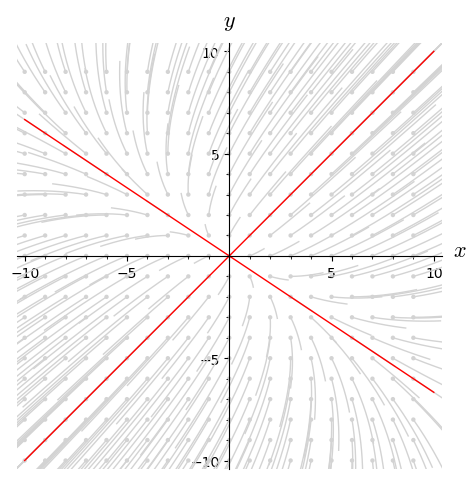

3.0
8.0
(-0.8320502943378437, 0.5547001962252291)
(-0.7071067811865475, -0.7071067811865475)


In [231]:
A = Matrix(RDF,[[5.0, 3.0], [2.0,6.0]])
eigs = A.eigenvectors_right()
l1 = eigs[0][0]
u1 = vector(eigs[0][1][0])

l2 = eigs[1][0]
u2 = vector(eigs[1][1][0])
cs = matrix([u1, u2]).solve_right(vector([0,0]))

p = parametric_plot([cs[0]*(u1[0])*exp(l1*t) + (cs[1])*(u1[1])*exp(l2*t), cs[0]*(u2[0])*exp(l1*t) + (cs[1])*(u2[1])*exp(l2*t)], (t, 0, 0.1), aspect_ratio=1, axes_labels=["$x$", "$y$"])

for i in srange(-10,10, 1):
    for j in srange(-10,10, 1):
        #cs = matrix([u1, u2]).solve_right(vector([i,j]))
        den = (u1[1]*u2[0]-u1[0]*u2[1])
        cs = [-(u2[1]*i-u2[0]*j)/den, -(-u1[1]*i+u1[0]*j)/den]
        p = p + parametric_plot([cs[0]*(u1[0])*exp(l1*t) + (cs[1])*(u2[0])*exp(l2*t), cs[0]*(u1[1])*exp(l1*t) + (cs[1])*(u2[1])*exp(l2*t)], (t, 0, 0.1), aspect_ratio=1, axes_labels=["$x$", "$y$"], color = "lightgray")
        p = p + points((i,j), xmin = -10, xmax = 10, ymin = -10, ymax = 10, color = "lightgray")
p = p + plot((u1[1]/u1[0])*x, (x,-10, 10), color = "red") + plot((u2[1]/u2[0])*x, (x,-10, 10), color = "red")
show(p)
print(l1)
print(l2)
print(u1)
print(u2)
#save(p, "linear_sys.png")

In [215]:
A = Matrix(RDF,[[-5, 3], [2, 6]])
eig = A.eigenvectors_right()
print(eig)
print(eig[0][1][0]/sqrt(eig[0][1][0][0]^2+eig[0][1][0][1]^2))
#eigs, vecs = np.linalg.eig(A)
print(vector(eig[0][1][0]))
#print(vecs)
#print(vecs[0,1])

[(-5.520797289396148, [(-0.9852639246698693, 0.17104092710262608)], 1), (6.520797289396148, [(-0.25199518663377607, -0.9677284877037611)], 1)]
(-0.9852639246698696, 0.1710409271026261)
(-0.9852639246698693, 0.17104092710262608)


In [206]:
eig[0][1][0][0]

-0.9852639246698693

In [255]:
def pplane(A,file):
    eigs = A.eigenvectors_right()
    l1 = eigs[0][0]
    u1 = vector(eigs[0][1][0])

    l2 = eigs[1][0]
    u2 = vector(eigs[1][1][0])
    cs = matrix([u1, u2]).solve_right(vector([0,0]))

    p = parametric_plot([cs[0]*(u1[0])*exp(l1*t) + (cs[1])*(u1[1])*exp(l2*t), cs[0]*(u2[0])*exp(l1*t) + (cs[1])*(u2[1])*exp(l2*t)], (t, 0, 1), aspect_ratio=1, axes_labels=["$x$", "$y$"])

    for i in srange(-10,10, 1):
        for j in srange(-10,10, 1):
            #cs = matrix([u1, u2]).solve_right(vector([i,j]))
            den = (u1[1]*u2[0]-u1[0]*u2[1])
            cs = [-(u2[1]*i-u2[0]*j)/den, -(-u1[1]*i+u1[0]*j)/den]
            p = p + parametric_plot([cs[0]*(u1[0])*exp(l1*t) + (cs[1])*(u2[0])*exp(l2*t), cs[0]*(u1[1])*exp(l1*t) + (cs[1])*(u2[1])*exp(l2*t)], (t, 0, 1), aspect_ratio=1, axes_labels=["$x$", "$y$"], color = "lightgray")
            p = p + points((i,j), xmin = -10, xmax = 10, ymin = -10, ymax = 10, color = "lightgray")
    p = p + plot((u1[1]/u1[0])*x, (x,-10, 10), color = "red") + plot((u2[1]/u2[0])*x, (x,-10, 10), color = "red")
    show(p)
    print(l1)
    print(l2)
    print(u1)
    print(u2)
    save(p, file)

11.0 24.0 25.0


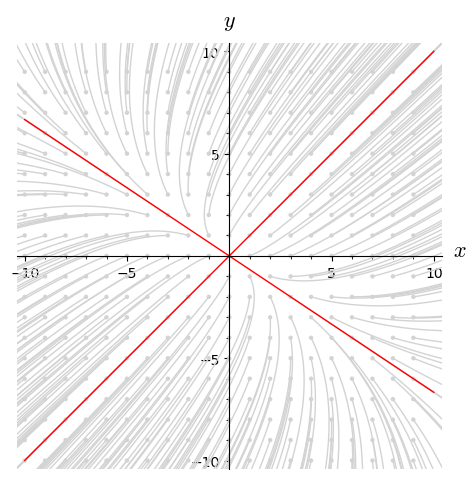

3.0
8.0
(-0.8320502943378437, 0.5547001962252291)
(-0.7071067811865475, -0.7071067811865475)


In [257]:
A = Matrix(RDF,[[5.0, 3.0], [2.0,6.0]])
tau = A[0,0]+A[1,1]
det = A[0,0]*A[1,1] - A[0,1]*A[1,0]
print(tau, det, tau^2 - 4*det)
pplane(A, "unstable-node.png")

1.0 -36.0 145.0


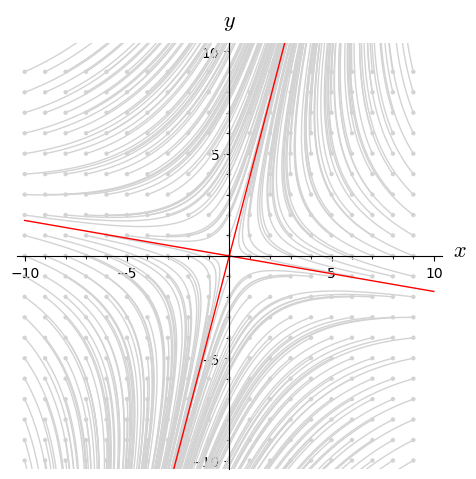

-5.520797289396148
6.520797289396148
(-0.9852639246698693, 0.17104092710262608)
(-0.25199518663377607, -0.9677284877037611)


In [258]:
A = Matrix(RDF,[[-5.0, 3.0], [2.0,6.0]])
tau = A[0,0]+A[1,1]
det = A[0,0]*A[1,1] - A[0,1]*A[1,0]
print(tau, det, tau^2 - 4*det)
pplane(A, "saddle.png")

In [254]:
A = Matrix(RDF,[[1.0, -3.0], [2.0,6.0]])
tau = A[0,0]+A[1,1]
det = A[0,0]*A[1,1] - A[0,1]*A[1,0]
print(tau, det, tau^2 - 4*det)
#pplane(A, "unstable-node.png")

7.0 12.0 1.0
